# Master Informatique, parcours Data Mining

### Carnets de note Python pour le cours de Text Mining

Julien Velcin, laboratoire ERIC, Université Lyon 2

# Visualisation (partie 2)

In [1]:
import os
import numpy as np
import umap
import umap.plot
import pandas as pd

La projection qui suit est basées sur la méthode UMAP :

McInnes, L, Healy, J, UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction, ArXiv e-prints 1802.03426, 2018. https://umap-learn.readthedocs.io

Les librairies requises sont : umap pandas matplotlib datashader bokeh holoviews colorcet

In [2]:
with open(os.path.join("datasets", "Frank Herbert - Dune.txt")) as f:
    lines = [line.strip() for line in f.readlines()]

## visualisation plongement naïf

In [3]:
data = np.loadtxt('vec_doc_naive.csv', delimiter='\t')

In [4]:
data.shape

(8608, 302)

In [5]:
dim = data.shape[1]-2
doc_vec = data[:, :dim]
mapper = umap.UMAP().fit(doc_vec)

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/jvelcin/arm/envs/cours21_spacy/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


On peut accéder aux coordonnées du plongement, avant de le visualiser.

In [6]:
mapper.embedding_.shape

(8608, 2)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:>

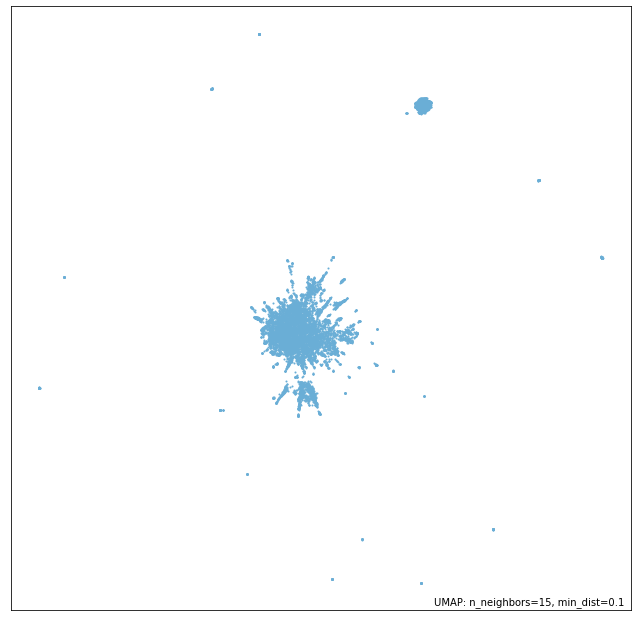

In [7]:
umap.plot.points(mapper)
#umap.plot.points(mapper, values=np.arange(ndocs))
#umap.plot.points(mapper, labels=np.array(classes))

On peut raffiner en n'affichant que les documents de plus de K mots, par exemple.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:>

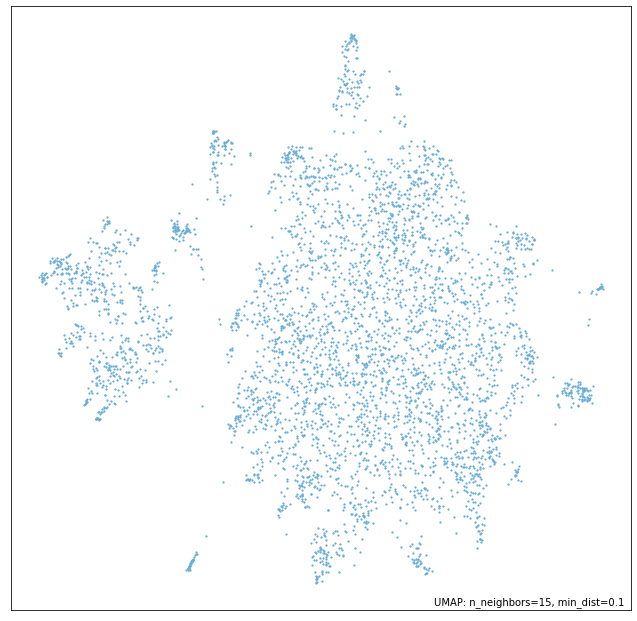

In [8]:
nb_words = data[:, dim]
min_words = 4

id_docs_light = np.where(nb_words > min_words)[0]

doc_vec_light = doc_vec[id_docs_light,:]
doc_vec_light.shape

mapper = umap.UMAP().fit(doc_vec_light)
umap.plot.points(mapper)

On voudrait une visualisation plus interactive, avec le numéro des documents attribués à chaque point (attention, il faut décaler de 1).

In [11]:
labels_id = [i+1 for i in id_docs_light]
labels_id[0:10]

[11, 14, 15, 16, 17, 18, 19, 22, 23, 24]

In [12]:
hover_data = pd.DataFrame({'index':np.arange(len(id_docs_light)),
                           'label':labels_id})
mapper = umap.UMAP().fit(doc_vec_light)
p = umap.plot.interactive(mapper, hover_data=hover_data, point_size=2)
umap.plot.show(p)

On peut raffiner, par ex. en rajoutant le texte correspondant aux points.

In [13]:
hover_data = pd.DataFrame({'index': np.arange(len(id_docs_light)),
                           'label': labels_id,
                           'text': [lines[t] for t in id_docs_light]})
mapper = umap.UMAP().fit(doc_vec_light)
p = umap.plot.interactive(mapper, hover_data=hover_data, point_size=2)
umap.plot.show(p)

Et des couleurs pour les clusters

In [14]:
data = np.loadtxt('vec_doc_naive_cl10.csv', delimiter='\t')

dim = data.shape[1]-3
doc_vec = data[:, :dim]
nb_words = data[:, dim]
clu_ids = data[:, dim+2]

min_words = 4
id_docs_light = np.where(nb_words > min_words)[0]
labels_id_light = [i+1 for i in id_docs_light]
doc_vec_light = doc_vec[id_docs_light,:]
clu_ids_light = clu_ids[id_docs_light]

mapper = umap.UMAP(n_neighbors=3).fit(doc_vec_light)

In [15]:
hover_data = pd.DataFrame({'label': labels_id_light,
                           'text': [lines[t] for t in id_docs_light]})
p = umap.plot.interactive(mapper, hover_data=hover_data, labels=clu_ids_light, point_size=2)
umap.plot.show(p)

<img src="img/vis_naive_clu.png" style='height: 400px'/>

## visualisation doc2vec

In [16]:
data = np.loadtxt('vec_doc_doc2vec_clu10.csv', delimiter='\t')
dim = data.shape[1]-3 # les deux dernières colonnes sont utilisées pour autre chose
doc_vec = data[:, :dim]
id_docs = data[:, dim+1]
clu_ids = data[:, dim+2]

In [17]:
mapper = umap.UMAP(n_neighbors = 3, min_dist = 0.1).fit(doc_vec)

In [19]:
hover_data = pd.DataFrame({'label': id_docs,
                           'text': [lines[int(t)-1] for t in id_docs]})
p = umap.plot.interactive(mapper, hover_data=hover_data, labels=clu_ids, point_size=2)
umap.plot.show(p)

<img src="img/vis_doc2vec_clu_2.png" style='height: 400px'/>